In [2]:
from selenium import webdriver
from time import sleep
from bs4 import BeautifulSoup, Comment
import pandas as pd
import time

Masukkan link aplikasi di playstore, setelah dipilih all review

In [3]:
driver = webdriver.Chrome()

link = 'https://play.google.com/store/apps/details?id=com.bukalapak.android&showAllReviews=true'
driver.get(link)

nama aplikasinya

In [ ]:
Ptitle = driver.find_element_by_class_name('AHFaub').text.replace(' ','')
print(Ptitle)

proses manual, 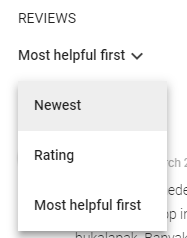 klik order by date sebelum lanjut ke tahap selanjutnya

In [ ]:
SCROLL_PAUSE_TIME = 2
# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        time.sleep(SCROLL_PAUSE_TIME)
        try:
            show_more_button = driver.find_elements_by_class_name('PFAhAf')[0]
            show_more_button.click()
        except:
            time.sleep(SCROLL_PAUSE_TIME)
            show_more_button = driver.find_elements_by_class_name('CwaK9')[0]
            show_more_button.click()
        except:
            time.sleep(SCROLL_PAUSE_TIME)
            show_more_button = driver.find_elements_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div[2]/div')[0]
            show_more_button.click()          
    last_height = new_height

Jika error, jalankan salah satu dari script di bawah, setelah itu ulang lagi script di atas

In [ ]:
show_more_button = driver.find_elements_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div[2]/div')[0]
show_more_button.click()

In [ ]:
show_more_button = driver.find_elements_by_class_name('CwaK9')[0]
show_more_button.click()

In [ ]:
show_more_button = driver.find_elements_by_xpath('//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div/div[1]/div/div[2]/div[2]/span[1]/div/button')[0]
show_more_button.click()

Setelah semua halaman ter scroll, program untuk ambil data komentar dan rating 

In [ ]:
html_source = driver.page_source
soup = BeautifulSoup(html_source, 'html.parser')
reviews = soup.find_all('div', jscontroller = 'H6eOGe')

i = 0
data = []
for review in reviews :
    user_name = review.find('span', class_ = 'X43Kjb').get_text()
    ratingx = review.find('div', class_ = 'pf5lIe')
    rating = ratingx.find('div').attrs['aria-label']
    review_date = review.find('span', class_ = 'p2TkOb').get_text()
    review_text = review.find('span', jsname = 'fbQN7e').get_text()
    if review_text == '' :
        review_text = review.find('span', jsname = 'bN97Pc').get_text()
    else :
        review_text = review.find('span', jsname = 'fbQN7e').get_text()
    try :
        reply = review.find('div', class_ = 'LVQB0b')
        reply.find('span', class_ = 'X43Kjb').get_text()
        reply.find('span', class_ = 'p2TkOb').get_text()
        reply_text = reply.get_text()
    except:
        reply_text = ''
        pass
    i=i+1
#     print(str(i)+' '+user_name+'-'+rating+'-'+review_date+'-'+review_text+' - '+reply_text)
    data.append((Ptitle, user_name,rating,review_date,review_text,reply_text))

df = pd.DataFrame(data, columns = ['title','user_name','rating','review_date','review_text','reply_text'])

df.to_csv( "Data Bukalapak.csv", index=False, quoting=0 )

data disimpan dalam pandas dataframe dan csv

In [ ]:
df.head()